In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache-fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
sudo: fc-cache-fv: command not found


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('모델학습용ESG_NonNull기업데이터.csv')

In [ ]:
data = data.fillna(0)

In [ ]:
X = data[[ '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)',
       '에너지 사용량(TJ)', '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가',
       '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '회사명', '업종',
       '지역', '시장구분']]

y_ESG = data[['ESG등급']]

y_환경 = data[['환경']]
y_사회 = data[['사회']]
y_지배구조 = data[['지배구조']]

In [ ]:
X

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,시가총액,거래량_y,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,회사명,업종,지역,시장구분
0,0.004840,0.044121,0.003254,0.010860,0.001137,0.003696,0.001234,0.003109,0.001613,0.001511,...,0.003430,0.005024,0.009753,0.034948,0.026214,0.008833,149,152,16,2
1,0.002931,0.031419,0.002808,0.009055,0.001048,0.004067,0.001291,0.001797,0.001608,0.004093,...,0.002193,0.008230,0.016548,0.038675,0.000000,0.010243,1426,93,8,2
2,0.003417,0.015960,0.003046,0.012056,0.000308,0.001251,0.000312,0.002090,0.000151,0.000000,...,0.002599,0.006805,0.013962,0.047888,0.000000,0.033675,684,122,8,1
3,0.012686,0.027822,0.011267,0.006055,0.000308,0.001251,0.000717,0.001460,0.001003,0.000390,...,0.001100,0.003777,0.000905,0.006008,0.000000,0.034504,1963,79,8,1
4,0.001362,0.023228,0.002691,0.004951,0.000280,0.001072,0.004695,0.009742,0.005406,0.007238,...,0.000413,0.000849,0.000680,0.019441,0.002162,0.034670,1015,116,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.003742,0.031189,0.000585,0.005986,0.003009,0.010164,0.019563,0.026000,0.016832,0.034725,...,0.006266,0.001264,0.005767,0.124431,0.003019,0.994982,16,53,8,2
951,0.020128,0.086571,0.005045,0.009599,0.000883,0.002380,0.068617,0.013619,0.013757,0.045882,...,0.008867,0.007968,0.009732,0.022878,0.000000,0.994982,696,61,8,2
952,0.004513,0.043995,0.000374,0.000341,0.001445,0.004511,0.017430,0.017463,0.019394,0.033854,...,0.000801,0.000534,0.000259,0.011387,0.003180,1.000000,236,134,8,2
953,0.004283,0.040641,0.001234,0.000548,0.000623,0.002411,0.002785,0.004090,0.003191,0.000195,...,0.000343,0.002056,0.000455,0.004555,0.000000,1.000000,1601,160,8,2


In [ ]:
X_train, X_test, y_ESG_train, y_ESG_test, y_환경_train, y_환경_test, y_사회_train, y_사회_test, y_지배구조_train, y_지배구조_test = train_test_split(X, y_ESG, y_환경, y_사회, y_지배구조, random_state=42) 

In [ ]:
feature_names = pd.DataFrame(X).columns

class_name_ESG = data['ESG등급'].unique().astype(str)
class_name_환경 = data['환경'].unique().astype(str)
class_name_사회 = data['사회'].unique().astype(str)
class_name_지배구조 = data['지배구조'].unique().astype(str)

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# random forest
rf_clf = RandomForestClassifier(min_samples_split = 2, random_state = 42)

# 개별 분류기에 train set 피팅
rf_clf.fit(X_train, y_ESG_train)

# train셋으로 prediction
rf_pred = rf_clf.predict(X_train)

hyperparamters = {'max_depth': list(range(1, 50)),  
                  'min_samples_split': list(range(1, 50)), 
                  'min_samples_leaf': list(range(1, 500)), 
                  'max_leaf_nodes': list(range(1, 50)),
                  'criterion': ['gini', 'entropy']}

# iteration 횟수를 정해주자!!!!!!!!
n_iter = 1000


# RandomizedSearch 진행
rs = RandomizedSearchCV(rf_clf, 
                        param_distributions=hyperparamters, 
                        n_iter = n_iter,
                        cv=5, verbose=3,
                        return_train_score = True)

rs.fit(X_train, y_ESG_train)
rs.best_params_ # 가장 좋은 성능을 보였을 때의 parameter


"\nfrom sklearn.ensemble import RandomForestClassifier\n\n# random forest\nrf_clf = RandomForestClassifier(min_samples_split = 2, random_state = 42)\n\n# 개별 분류기에 train set 피팅\nrf_clf.fit(X_train, y_ESG_train)\n\n# train셋으로 prediction\nrf_pred = rf_clf.predict(X_train)\n\nhyperparamters = {'max_depth': list(range(1, 50)),  \n                  'min_samples_split': list(range(1, 50)), \n                  'min_samples_leaf': list(range(1, 500)), \n                  'max_leaf_nodes': list(range(1, 50)),\n                  'criterion': ['gini', 'entropy']}\n\n# iteration 횟수를 정해주자!!!!!!!!\nn_iter = 100\n\n\n# RandomizedSearch 진행\nrs = RandomizedSearchCV(rf_clf, \n                        param_distributions=hyperparamters, \n                        n_iter = n_iter,\n                        cv=5, verbose=3,\n                        return_train_score = True)\n\nrs.fit(X_train, y_ESG_train)\nrs.best_params_ # 가장 좋은 성능을 보였을 때의 parameter\n"

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# rf_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 34, max_leaf_nodes = 47, min_samples_leaf = 18, min_samples_split = 38,  random_state = 42)
rf_clf = RandomForestClassifier(random_state = 42)
# 개별 분류기에 train set 피팅
rf_clf.fit(X_train, y_ESG_train)

# train셋으로 prediction
rf_pred = rf_clf.predict(X_train)

# 성능 확인
# accuracy_score 계산
# print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(rf_pred,y_ESG_test)))


# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
rf_scores = cross_validate(rf_clf, X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(rf_scores['test_f1_macro'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.376


Text(0, 0.5, 'attr')

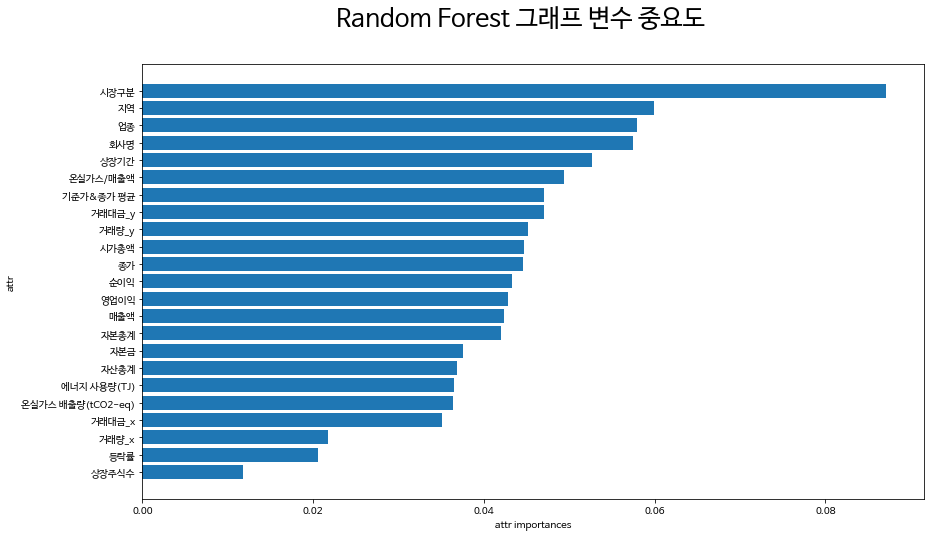

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
plt.suptitle('Random Forest 그래프 변수 중요도', size = 25, ha = 'center')
plt.barh(pd.DataFrame(X_train).columns,np.sort(rf_clf.feature_importances_), align='center')
plt.xlabel("attr importances")
plt.ylabel("attr")

# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# gradient boost
gb_clf = GradientBoostingClassifier(random_state = 42)

# 개별 분류기에 train set 피팅
gb_clf.fit(X_train,y_ESG_train) 

# train셋으로 prediction
gb_pred = gb_clf.predict(X_train)

# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(gb_pred,y_ESG_test)))

# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
gb_scores = cross_validate(gb_clf, X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(gb_scores['test_f1_macro'])))

parameter가 tuning 되지 않았을 때의 Accuracy: 0.439
parameter가 tuning 되지 않았을 때의 F1 Score : 0.371


Text(0, 0.5, 'attr')

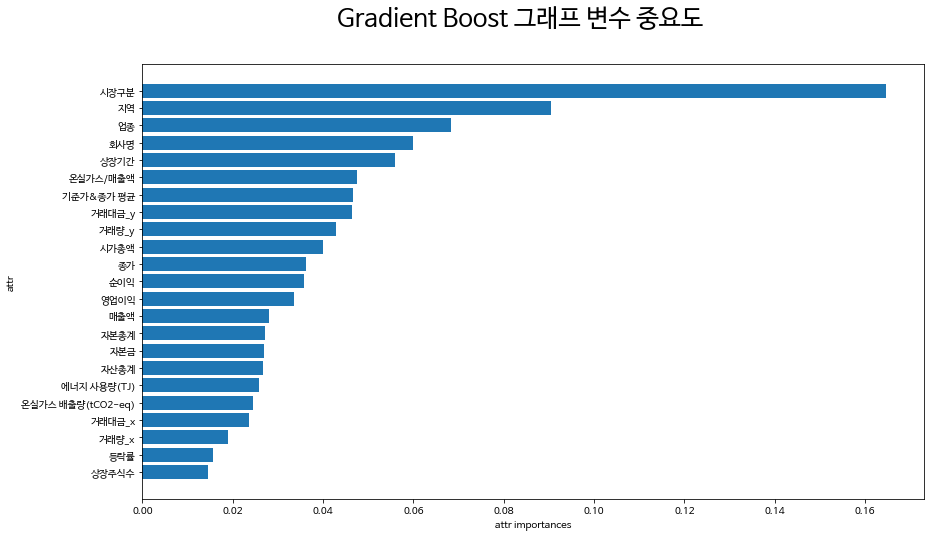

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
plt.suptitle('Gradient Boost 그래프 변수 중요도', size = 25, ha = 'center')
plt.barh(pd.DataFrame(X_train).columns,np.sort(gb_clf.feature_importances_), align='center')
plt.xlabel("attr importances")
plt.ylabel("attr")

# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# gradient boost
Ab_clf = AdaBoostClassifier(random_state = 42)

# 개별 분류기에 train set 피팅
Ab_clf.fit(X_train,y_ESG_train) 

# train셋으로 prediction
Ab_pred = Ab_clf.predict(X_train)

# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(Ab_pred,y_ESG_test)))

# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
Ab_scores = cross_validate(Ab_clf, X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(Ab_scores['test_f1_macro'])))

parameter가 tuning 되지 않았을 때의 Accuracy: 0.289
parameter가 tuning 되지 않았을 때의 F1 Score : 0.190


Text(0, 0.5, 'attr')

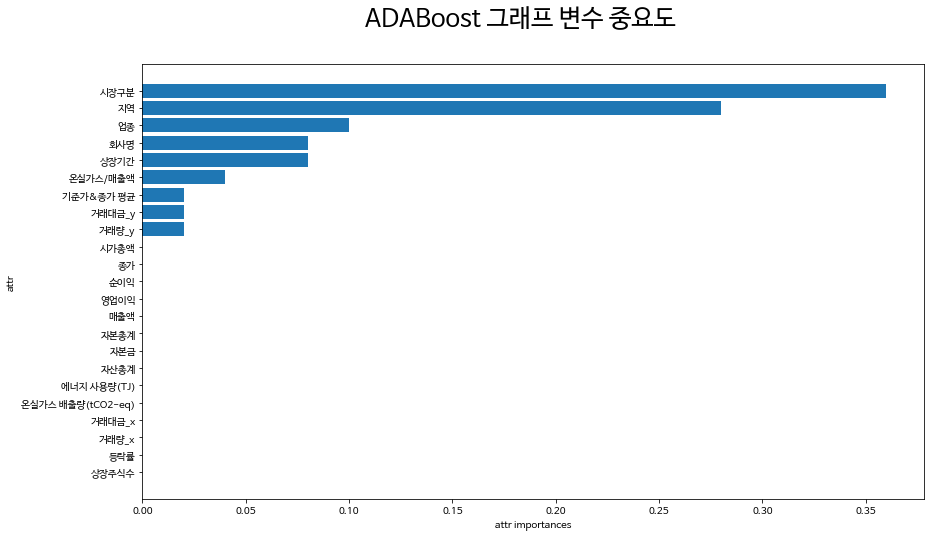

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
plt.suptitle('ADABoost 그래프 변수 중요도', size = 25, ha = 'center')
plt.barh(pd.DataFrame(X_train).columns,np.sort(Ab_clf.feature_importances_), align='center')
plt.xlabel("attr importances")
plt.ylabel("attr")

# CatBoostClassifier

https://velog.io/@yelim421/CatBoostClassifier-%EB%AA%A8%EB%8D%B8%EB%A7%81

In [ ]:
# ! pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier

# CAT boost
Cat_clf = CatBoostClassifier(random_state = 42)

# 개별 분류기에 train set 피팅
Cat_clf.fit(X_train,y_ESG_train) 

# train셋으로 prediction
Cat_pred = Cat_clf.predict(X_train)

# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(Cat_pred,y_ESG_test)))

# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
Cat_scores = cross_validate(Cat_clf, X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(Cat_scores['test_f1_macro'])))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5:	learn: 1.5681288	total: 147ms	remaining: 24.3s
6:	learn: 1.5393999	total: 171ms	remaining: 24.2s
7:	learn: 1.5139186	total: 204ms	remaining: 25.2s
8:	learn: 1.4820793	total: 228ms	remaining: 25.1s
9:	learn: 1.4578177	total: 251ms	remaining: 24.8s
10:	learn: 1.4337994	total: 278ms	remaining: 25s
11:	learn: 1.4135333	total: 301ms	remaining: 24.8s
12:	learn: 1.3940436	total: 330ms	remaining: 25s
13:	learn: 1.3733813	total: 359ms	remaining: 25.3s
14:	learn: 1.3527915	total: 382ms	remaining: 25.1s
15:	learn: 1.3385314	total: 405ms	remaining: 24.9s
16:	learn: 1.3213876	total: 433ms	remaining: 25.1s
17:	learn: 1.3051111	total: 456ms	remaining: 24.9s
18:	learn: 1.2890857	total: 479ms	remaining: 24.7s
19:	learn: 1.2747552	total: 502ms	remaining: 24.6s
20:	learn: 1.2621211	total: 524ms	remaining: 24.4s
21:	learn: 1.2481240	total: 549ms	remaining: 24.4s
22:	learn: 1.2358494	total: 572ms	remaining: 24.3s
23:	learn: 1.2234109	total: 597ms	remaining: 24.3s
24:	

In [ ]:
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(Cat_pred,y_ESG_test)))
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(Cat_scores['test_f1_macro'])))

parameter가 tuning 되지 않았을 때의 Accuracy: 0.469
parameter가 tuning 되지 않았을 때의 F1 Score : 0.409


Text(0, 0.5, 'attr')

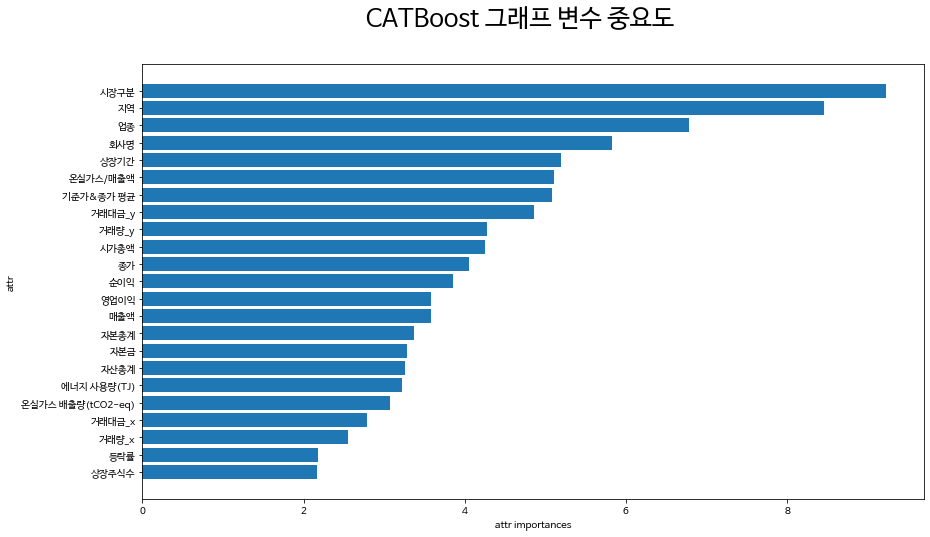

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
plt.suptitle('CATBoost 그래프 변수 중요도', size = 25, ha = 'center')
plt.barh(pd.DataFrame(X_train).columns,np.sort(Cat_clf.feature_importances_), align='center')
plt.xlabel("attr importances")
plt.ylabel("attr")

# LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

# CAT boost
lgbm_clf = LGBMClassifier(objective='multiclass', random_state=42)

# 개별 분류기에 train set 피팅
lgbm_clf.fit(X_train,y_ESG_train) 

# train셋으로 prediction
lgbm_pred = lgbm_clf.predict(X_train)

# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(lgbm_pred,y_ESG_test)))

# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
lgbm_scores = cross_validate(lgbm_clf, X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(lgbm_scores['test_f1_macro'])))

parameter가 tuning 되지 않았을 때의 Accuracy: 0.490
parameter가 tuning 되지 않았을 때의 F1 Score : 0.387


Text(0, 0.5, 'attr')

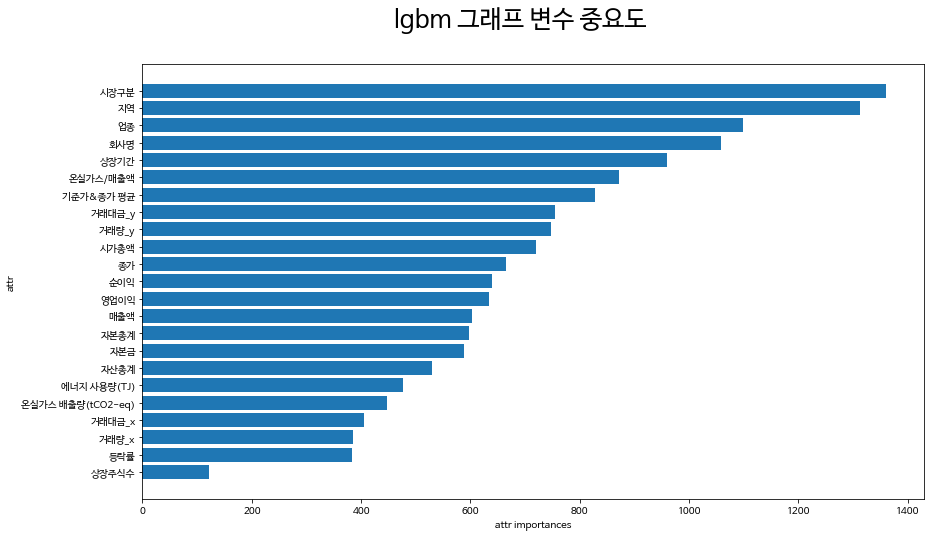

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
plt.suptitle('lgbm 그래프 변수 중요도', size = 25, ha = 'center')
plt.barh(pd.DataFrame(X_train).columns,np.sort(lgbm_clf.feature_importances_), align='center')
plt.xlabel("attr importances")
plt.ylabel("attr")

# xgb (미완성)
https://injo.tistory.com/44

In [ ]:
import xgboost as xgb 

# CAT boost
lgbm_clf = LGBMClassifier(objective='multiclass', random_state=42)

# 개별 분류기에 train set 피팅
lgbm_clf.fit(X_train,y_ESG_train) 

# train셋으로 prediction
lgbm_pred = lgbm_clf.predict(X_train)

# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(lgbm_pred,y_ESG_test)))

# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
lgbm_scores = cross_validate(lgbm_clf, X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(lgbm_scores['test_f1_macro'])))

parameter가 tuning 되지 않았을 때의 Accuracy: 0.490
parameter가 tuning 되지 않았을 때의 F1 Score : 0.387


# MLPClassifier

https://www.kaggle.com/code/hatone/mlpclassifier-with-gridsearchcv/script

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# MLP Classifier
MLP_clf = MLPClassifier(random_state = 42)

# 개별 분류기에 train set 피팅
MLP_clf.fit(X_train,y_ESG_train) 

# test셋으로 prediction
MLP_pred = MLP_clf.predict_proba(X_train)


# RandomizedSearchCV hyperparamters
hyperparamters = {'max_depth': list(range(1, 50)),  
                  'min_samples_split': list(range(1, 80)), 
                  'min_samples_leaf': list(range(1, 100)), 
                  'max_leaf_nodes': list(range(1, 100)),
                  'criterion': ['gini', 'entropy']}

# iteration 횟수를  지정
n_iter = 1000

# RandomizedSearch 진행
rs = RandomizedSearchCV(MLP_clf, 
                        param_distributions=hyperparamters, 
                        n_iter = n_iter,
                        cv=5, verbose=3,
                        return_train_score = True)


In [ ]:
rs.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_fun', 'estimator__max_iter', 'estimator__momentum', 'estimator__n_iter_no_change', 'estimator__nesterovs_momentum', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__solver', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [ ]:
# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
MLP_scores = cross_validate(MLP_clf, X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(Ab_scores['test_f1_macro'])))

# ROC Curve

https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a

In [ ]:
from sklearn.metrics import plot_roc_curve

roc = plot_roc_curve(rf_clf , X_train, y_ESG_train)
roc_RF = plot_roc_curve(rf_clf , X_train, y_ESG_train, ax = roc.ax_)
roc_GradientBoost = plot_roc_curve(gb_clf, X_train, y_ESG_train, ax = roc.ax_)
roc_ADA = plot_roc_curve(Ab_clf, X_train, y_ESG_train, ax = roc.ax_)
roc_Cat = plot_roc_curve(Cat_clf, X_train, y_ESG_train, ax = roc.ax_)
roc_lgbm = plot_roc_curve(lgbm_clf, X_train, y_ESG_train, ax = roc.ax_)
# roc_svm = plot_roc_curve(lgbm_clf, X_train, y_ESG_train, ax = roc.ax_)
# roc_MLP = plot_roc_curve(MLP_clf, X_train, y_ESG_train, ax = roc.ax_)
roc_RF.figure_.suptitle("ROC curve comparison");

# 오버 샘플링

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
oversampling_instance = SMOTE(k_neighbors = 3)

In [ ]:
o_X, o_y_ESG = oversampling_instance.fit_resample(X, y_ESG)

In [ ]:
o_X_train, o_X_test, o_y_ESG_train, o_y_ESG_test = train_test_split(o_X, o_y_ESG, random_state=42) 

# Oversampled Random Forest

In [ ]:
# train
rf_scores_train = cross_validate(rf_clf,X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("(train set) rf_score before Oversampling - F1 Score: {:.3f}".format(np.mean(rf_scores_train['test_f1_macro'])))

# test
rf_scores_test = cross_validate(rf_clf, X_test, y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("(test set) rf_score before Oversampling - F1 Score: {:.3f}".format(np.mean(rf_scores_test['test_f1_macro'])))

################## OverSampling ##################################
# train
rf_scores_otrain = cross_validate(rf_clf, o_X_train, o_y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("(train set) rf_score after Oversampling - F1 Score: {:.3f}".format(np.mean(rf_scores_otrain['test_f1_macro'])))

# test
rf_scores_otest = cross_validate(rf_clf, o_X_test, o_y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("(test set) rf_score after Oversampling - F1 Score: {:.3f}".format(np.mean(rf_scores_otest['test_f1_macro'])))

(train set) rf_score before Oversampling - F1 Score: 0.376
(test set) rf_score before Oversampling - F1 Score: 0.362
(train set) rf_score after Oversampling - F1 Score: 0.731
(test set) rf_score after Oversampling - F1 Score: 0.614


# Oversampled Gradient Boost



In [ ]:
# train
gb_scores_train = cross_validate(gb_clf,X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("(train set) gb_score before Oversampling - F1 Score: {:.3f}".format(np.mean(gb_scores_train['test_f1_macro'])))

# test
gb_scores_test = cross_validate(gb_clf, X_test, y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("(test set) gb_score before Oversampling - F1 Score: {:.3f}".format(np.mean(gb_scores_test['test_f1_macro'])))

################## OverSampling ##################################

# train
gb_scores_otrain = cross_validate(gb_clf, o_X_train, o_y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("(train set) gb_score after Oversampling - F1 Score: {:.3f}".format(np.mean(gb_scores_otrain['test_f1_macro'])))

# test
gb_scores_otest = cross_validate(gb_clf, o_X_test, o_y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("(test set) gb_score after Oversampling - F1 Score: {:.3f}".format(np.mean(gb_scores_otest['test_f1_macro'])))

(train set) gb_score before Oversampling - F1 Score: 0.371
(test set) gb_score before Oversampling - F1 Score: 0.323
(train set) gb_score after Oversampling - F1 Score: 0.700
(test set) gb_score after Oversampling - F1 Score: 0.615


# Oversampled ADA Boost

In [ ]:
# train
Ab_scores_train = cross_validate(Ab_clf,X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("(train set) ADA_score before Oversampling - F1 Score: {:.3f}".format(np.mean(Ab_scores_train['test_f1_macro'])))

# test
Ab_scores_test = cross_validate(Ab_clf, X_test, y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("(test set) ADA_score before Oversampling - F1 Score: {:.3f}".format(np.mean(Ab_scores_test['test_f1_macro'])))

################## OverSampling ##################################

# train
Ab_scores_otrain = cross_validate(Ab_clf, o_X_train, o_y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("(train set) ADA_score after Oversampling - F1 Score: {:.3f}".format(np.mean(Ab_scores_otrain['test_f1_macro'])))

# test
Ab_scores_otest = cross_validate(Ab_clf, o_X_test, o_y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("(test set) ADA_score after Oversampling - F1 Score: {:.3f}".format(np.mean(Ab_scores_otest['test_f1_macro'])))

(train set) ADA_score before Oversampling - F1 Score: 0.190
(test set) ADA_score before Oversampling - F1 Score: 0.222
(train set) ADA_score after Oversampling - F1 Score: 0.396
(test set) ADA_score after Oversampling - F1 Score: 0.231


# Oversampled CAT Boost

In [ ]:
# train
CAT_scores_train = cross_validate(Cat_clf, o_X_train, o_y_ESG_train, scoring=scoring, cv=5, return_train_score = False)

# test
CAT_scores_test = cross_validate(Cat_clf, o_X_test, o_y_ESG_test, scoring=scoring, cv=5, return_train_score = False)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 1.5927646	total: 142ms	remaining: 28.3s
5:	learn: 1.5624503	total: 167ms	remaining: 27.6s
6:	learn: 1.5303382	total: 190ms	remaining: 27s
7:	learn: 1.4958669	total: 215ms	remaining: 26.6s
8:	learn: 1.4697197	total: 239ms	remaining: 26.3s
9:	learn: 1.4439904	total: 268ms	remaining: 26.5s
10:	learn: 1.4176825	total: 293ms	remaining: 26.3s
11:	learn: 1.3965694	total: 324ms	remaining: 26.7s
12:	learn: 1.3733911	total: 348ms	remaining: 26.4s
13:	learn: 1.3551777	total: 372ms	remaining: 26.2s
14:	learn: 1.3318881	total: 396ms	remaining: 26s
15:	learn: 1.3130228	total: 421ms	remaining: 25.9s
16:	learn: 1.2954089	total: 444ms	remaining: 25.7s
17:	learn: 1.2760188	total: 474ms	remaining: 25.8s
18:	learn: 1.2585752	total: 498ms	remaining: 25.7s
19:	learn: 1.2383454	total: 539ms	remaining: 26.4s
20:	learn: 1.2212731	total: 562ms	remaining: 26.2s
21:	learn: 1.2036458	total: 584ms	remaining: 26s
22:	learn: 1.1848262	total: 607ms	remaining: 25.8s
23:	lea

In [ ]:
# train
print("(train set) CAT_score after Oversampling - F1 Score: {:.3f}".format(np.mean(CAT_scores_train['test_f1_macro'])))

# test
print("(test set) CAT_score after Oversampling - F1 Score: {:.3f}".format(np.mean(CAT_scores_test['test_f1_macro'])))

(train set) CAT_score after Oversampling - F1 Score: 0.720
(test set) CAT_score after Oversampling - F1 Score: 0.634


# Oversampled LGBM

In [ ]:
# train
LGBM_scores_train = cross_validate(lgbm_clf,X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("(train set) LGBM_score before Oversampling - F1 Score: {:.3f}".format(np.mean(LGBM_scores_train['test_f1_macro'])))

# test
LGBM_scores_test = cross_validate(lgbm_clf, X_test, y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("(test set) LGBM_score before Oversampling - F1 Score: {:.3f}".format(np.mean(LGBM_scores_test['test_f1_macro'])))

################## OverSampling ##################################

# train
LGBM_scores_otrain = cross_validate(lgbm_clf, o_X_train, o_y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("(train set) LGBM_score after Oversampling - F1 Score: {:.3f}".format(np.mean(LGBM_scores_otrain['test_f1_macro'])))

# test
LGBM_scores_otest = cross_validate(lgbm_clf, o_X_test, o_y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("(test set) LGBM_score after Oversampling - F1 Score: {:.3f}".format(np.mean(LGBM_scores_otest['test_f1_macro'])))

(train set) LGBM_score before Oversampling - F1 Score: 0.387
(test set) LGBM_score before Oversampling - F1 Score: 0.371
(train set) LGBM_score after Oversampling - F1 Score: 0.727
(test set) LGBM_score after Oversampling - F1 Score: 0.621


# Oversampled MLP

In [ ]:
# train
MLP_scores_train = cross_validate(MLP_clf,X_train, y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("(train set) MLP_score before Oversampling - F1 Score: {:.3f}".format(np.mean(MLP_scores_train['test_f1_macro'])))

# test
MLP_scores_test = cross_validate(MLP_clf, X_test, y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("(test set) MLP_score before Oversampling - F1 Score: {:.3f}".format(np.mean(MLP_scores_test['test_f1_macro'])))

################## OverSampling ##################################

# train
MLP_scores_otrain = cross_validate(MLP_clf, o_X_train, o_y_ESG_train, scoring=scoring, cv=5, return_train_score = False)
print("(train set) MLP_score after Oversampling - F1 Score: {:.3f}".format(np.mean(MLP_scores_otrain['test_f1_macro'])))

# test
MLP_scores_otest = cross_validate(MLP_clf, o_X_test, o_y_ESG_test, scoring=scoring, cv=5, return_train_score = False)
print("(test set) MLP_score after Oversampling - F1 Score: {:.3f}".format(np.mean(MLP_scores_otest['test_f1_macro'])))

(train set) MLP_score before Oversampling - F1 Score: 0.155
(test set) MLP_score before Oversampling - F1 Score: 0.175
(train set) MLP_score after Oversampling - F1 Score: 0.336
(test set) MLP_score after Oversampling - F1 Score: 0.364


<BarContainer object of 12 artists>

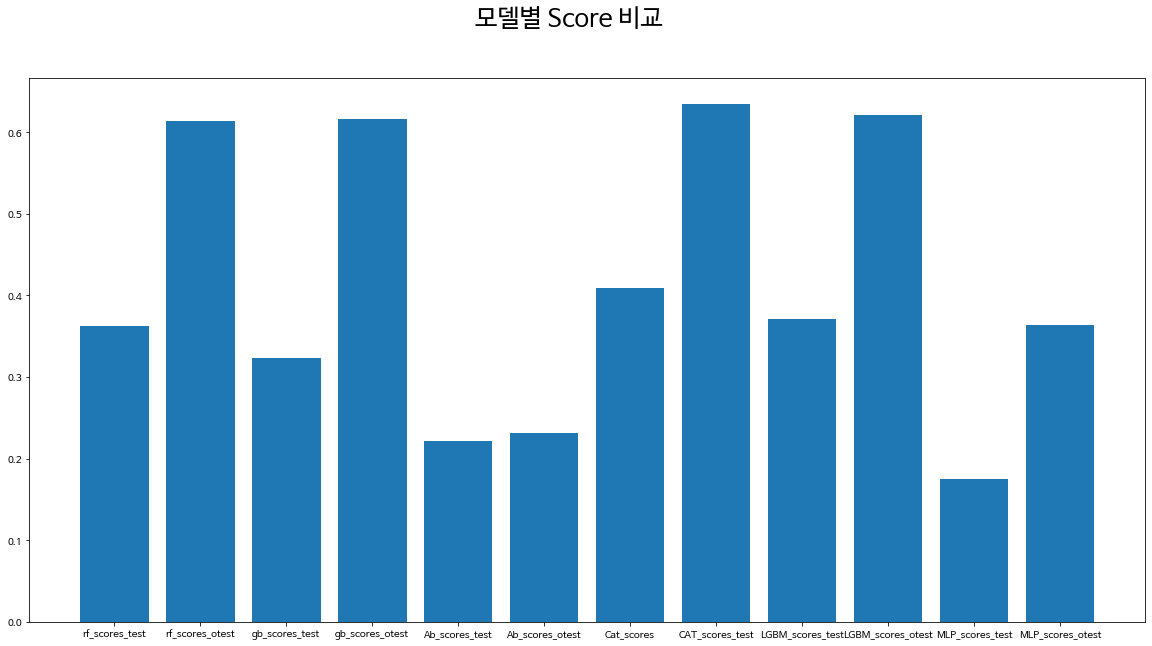

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))
plt.suptitle('모델별 Score 비교', size = 25)
x = ['rf_scores_test',
     'rf_scores_otest',
     'gb_scores_test',
     'gb_scores_otest',
     'Ab_scores_test',
     'Ab_scores_otest',
     'Cat_scores',
     'CAT_scores_test',
     'LGBM_scores_test',
     'LGBM_scores_otest',
     'MLP_scores_test',
     'MLP_scores_otest']


y = [np.mean(rf_scores_test['test_f1_macro']),
     np.mean(rf_scores_otest['test_f1_macro']),

      np.mean(gb_scores_test['test_f1_macro']),
      np.mean(gb_scores_otest['test_f1_macro']),

      np.mean(Ab_scores_test['test_f1_macro']),
      np.mean(Ab_scores_otest['test_f1_macro']),

      np.mean(Cat_scores['test_f1_macro']),
      np.mean(CAT_scores_test['test_f1_macro']),

      np.mean(LGBM_scores_test['test_f1_macro']),
      np.mean(LGBM_scores_otest['test_f1_macro']),

      np.mean(MLP_scores_test['test_f1_macro']),
      np.mean(MLP_scores_otest['test_f1_macro'])
          
      ]
plt.bar(x, y)

# 최종 ESG NULL값 데이터 예측

In [ ]:
! pip install catboost

In [ ]:
from catboost import CatBoostClassifier
Cat_clf = CatBoostClassifier(random_state = 42)

Cat_clf.fit(o_X, o_y_ESG) 

Learning rate set to 0.081548
0:	learn: 1.7115699	total: 99.5ms	remaining: 1m 39s
1:	learn: 1.6436428	total: 192ms	remaining: 1m 35s
2:	learn: 1.5834005	total: 328ms	remaining: 1m 48s
3:	learn: 1.5298848	total: 416ms	remaining: 1m 43s
4:	learn: 1.4858487	total: 496ms	remaining: 1m 38s
5:	learn: 1.4481542	total: 563ms	remaining: 1m 33s
6:	learn: 1.4123286	total: 623ms	remaining: 1m 28s
7:	learn: 1.3810439	total: 684ms	remaining: 1m 24s
8:	learn: 1.3539496	total: 742ms	remaining: 1m 21s
9:	learn: 1.3201300	total: 813ms	remaining: 1m 20s
10:	learn: 1.2961937	total: 846ms	remaining: 1m 16s
11:	learn: 1.2689917	total: 895ms	remaining: 1m 13s
12:	learn: 1.2449772	total: 945ms	remaining: 1m 11s
13:	learn: 1.2221440	total: 1000ms	remaining: 1m 10s
14:	learn: 1.1978062	total: 1.08s	remaining: 1m 10s
15:	learn: 1.1759993	total: 1.12s	remaining: 1m 9s
16:	learn: 1.1541742	total: 1.17s	remaining: 1m 7s
17:	learn: 1.1344716	total: 1.21s	remaining: 1m 6s
18:	learn: 1.1176775	total: 1.27s	remaining: 

In [ ]:
test_data = pd.read_csv('모델대입용ESG_Null기업데이터.csv')

In [ ]:
test_data.columns

Index(['Unnamed: 0', '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)',
       '에너지 사용량(TJ)', '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가',
       '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '회사명', '업종',
       '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조'],
      dtype='object')

In [ ]:
test_data_X = test_data[['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)',
       '에너지 사용량(TJ)', '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가',
       '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '회사명', '업종',
       '지역', '시장구분']]

In [ ]:
test_data_X.head(1)

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,시가총액,거래량_y,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,회사명,업종,지역,시장구분
0,0.000818,0.03968,0.0,0.0,0.000308,0.001251,0.000848,0.001489,0.001073,0.0009,...,0.001653,0.0,0.0,0.007569,0.0,0.0,719,79,1,1


In [ ]:
o_X.head(1)

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,시가총액,거래량_y,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,회사명,업종,지역,시장구분
0,0.00484,0.044121,0.003254,0.01086,0.001137,0.003696,0.001234,0.003109,0.001613,0.001511,...,0.00343,0.005024,0.009753,0.034948,0.026214,0.008833,149,152,16,2


In [ ]:
Cat_pred = pd.DataFrame(Cat_clf.predict(test_data_X))

In [ ]:
test_data_X_with_pred = pd.concat([test_data_X,Cat_pred], axis=1)

In [ ]:
test_data_X_with_pred.columns = [            '상장주식수',               '등락률',             '거래량_x',
                  '거래대금_x', '온실가스 배출량(tCO2-eq)',       '에너지 사용량(TJ)',
                    '자산총계',               '자본금',              '자본총계',
                     '매출액',              '영업이익',               '순이익',
                      '종가',              '시가총액',             '거래량_y',
                  '거래대금_y',         '기준가&종가 평균',          '온실가스/매출액',
                    '상장기간',               '회사명',                '업종',
                      '지역',              '시장구분',                   'ESG등급']

In [ ]:
test_data_X_with_pred.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,거래량_y,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,회사명,업종,지역,시장구분,ESG등급
0,0.000818,0.03968,0.0,0.0,0.000308,0.001251,0.000848,0.001489,0.001073,0.000900,...,0.0,0.0,0.007569,0.00000,0.000000,719,79,1,1,4
1,0.000527,0.03968,0.0,0.0,0.000885,0.002671,0.041690,0.105331,0.009775,0.003764,...,0.0,0.0,0.001811,0.00000,0.000124,1303,25,8,1,4
2,0.001667,0.03968,0.0,0.0,0.000463,0.002098,0.000778,0.001373,0.001079,0.000812,...,0.0,0.0,0.008184,0.00000,0.000290,367,105,1,1,4
3,0.001992,0.03968,0.0,0.0,0.000339,0.001374,0.001309,0.004769,0.001256,0.001837,...,0.0,0.0,0.004369,0.00267,0.000290,828,58,1,1,4
4,0.003445,0.03968,0.0,0.0,0.000708,0.002880,0.001040,0.003661,0.001217,0.001619,...,0.0,0.0,0.006878,0.00000,0.000415,2172,131,1,1,2


In [ ]:
test_data_X_with_pred['ESG여부'] = '예측'
test_data_X_with_pred.head(1)

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,회사명,업종,지역,시장구분,ESG등급,ESG여부
0,0.000818,0.03968,0.0,0.0,0.000308,0.001251,0.000848,0.001489,0.001073,0.0009,...,0.0,0.007569,0.0,0.0,719,79,1,1,4,예측


In [ ]:
true_data = pd.concat([X, y_ESG],axis =1)

In [ ]:
true_data['ESG여부'] = '실제'
true_data.head(1)

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,회사명,업종,지역,시장구분,ESG등급,ESG여부
0,0.00484,0.044121,0.003254,0.01086,0.001137,0.003696,0.001234,0.003109,0.001613,0.001511,...,0.009753,0.034948,0.026214,0.008833,149,152,16,2,3,실제


In [ ]:
data_total = pd.concat([true_data, test_data_X_with_pred],axis =0)
data_total

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,회사명,업종,지역,시장구분,ESG등급,ESG여부
0,0.004840,0.044121,0.003254,0.010860,0.001137,0.003696,0.001234,0.003109,0.001613,0.001511,...,0.009753,0.034948,0.026214,0.008833,149,152,16,2,3,실제
1,0.002931,0.031419,0.002808,0.009055,0.001048,0.004067,0.001291,0.001797,0.001608,0.004093,...,0.016548,0.038675,0.000000,0.010243,1426,93,8,2,4,실제
2,0.003417,0.015960,0.003046,0.012056,0.000308,0.001251,0.000312,0.002090,0.000151,0.000000,...,0.013962,0.047888,0.000000,0.033675,684,122,8,1,4,실제
3,0.012686,0.027822,0.011267,0.006055,0.000308,0.001251,0.000717,0.001460,0.001003,0.000390,...,0.000905,0.006008,0.000000,0.034504,1963,79,8,1,2,실제
4,0.001362,0.023228,0.002691,0.004951,0.000280,0.001072,0.004695,0.009742,0.005406,0.007238,...,0.000680,0.019441,0.002162,0.034670,1015,116,10,2,2,실제
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0.002201,0.048584,0.001129,0.001276,0.000757,0.003027,0.007002,0.088939,0.006485,0.011522,...,0.000515,0.013602,0.028926,0.488243,2233,1,7,1,4,예측
1541,0.027070,0.039232,0.131912,0.017639,0.000885,0.002671,0.002917,0.014005,0.003591,0.001047,...,0.001943,0.001195,0.000000,0.492390,155,85,8,1,5,예측
1542,0.013108,0.048849,0.012018,0.001026,0.000885,0.002671,0.002917,0.014005,0.003591,0.001047,...,0.000553,0.001021,0.000000,0.499689,1424,85,8,1,5,예측
1543,0.001749,0.045047,0.004219,0.001714,0.038241,0.044688,0.004359,0.008630,0.004339,0.003751,...,0.000205,0.004062,0.458089,0.502509,723,82,15,1,4,예측


In [ ]:
data_total.to_csv('(최종)ESG예측데이터.csv')

# 오버샘플링 방법론 변경 - ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority', n_neighbors  = 3, random_state=42)
ADASYN_o_X, ADASYN_o_y_ESG = ada.fit_resample(X, y_ESG)

In [ ]:
from catboost import CatBoostClassifier
Cat_clf = CatBoostClassifier(random_state = 42)

Cat_clf.fit(ADASYN_o_X, ADASYN_o_y_ESG) 

Learning rate set to 0.079993
0:	learn: 1.6989514	total: 147ms	remaining: 2m 26s
1:	learn: 1.6284749	total: 252ms	remaining: 2m 5s
2:	learn: 1.5698211	total: 336ms	remaining: 1m 51s
3:	learn: 1.5096466	total: 425ms	remaining: 1m 45s
4:	learn: 1.4638669	total: 487ms	remaining: 1m 36s
5:	learn: 1.4233468	total: 553ms	remaining: 1m 31s
6:	learn: 1.3858863	total: 604ms	remaining: 1m 25s
7:	learn: 1.3535171	total: 674ms	remaining: 1m 23s
8:	learn: 1.3216926	total: 719ms	remaining: 1m 19s
9:	learn: 1.2898276	total: 764ms	remaining: 1m 15s
10:	learn: 1.2645259	total: 821ms	remaining: 1m 13s
11:	learn: 1.2411704	total: 881ms	remaining: 1m 12s
12:	learn: 1.2222712	total: 943ms	remaining: 1m 11s
13:	learn: 1.2013144	total: 1.02s	remaining: 1m 11s
14:	learn: 1.1837142	total: 1.06s	remaining: 1m 9s
15:	learn: 1.1610741	total: 1.12s	remaining: 1m 8s
16:	learn: 1.1452330	total: 1.18s	remaining: 1m 8s
17:	learn: 1.1294639	total: 1.22s	remaining: 1m 6s
18:	learn: 1.1141378	total: 1.31s	remaining: 1m 7

In [ ]:
Cat_pred = pd.DataFrame(Cat_clf.predict(test_data_X))

In [ ]:
ADASYN_test_data_X_with_pred = pd.concat([test_data_X,Cat_pred], axis=1)

In [ ]:
ADASYN_test_data_X_with_pred.columns = [            '상장주식수',               '등락률',             '거래량_x',
                  '거래대금_x', '온실가스 배출량(tCO2-eq)',       '에너지 사용량(TJ)',
                    '자산총계',               '자본금',              '자본총계',
                     '매출액',              '영업이익',               '순이익',
                      '종가',              '시가총액',             '거래량_y',
                  '거래대금_y',         '기준가&종가 평균',          '온실가스/매출액',
                    '상장기간',               '회사명',                '업종',
                      '지역',              '시장구분',                   'ESG등급']

In [ ]:
ADASYN_test_data_X_with_pred.head(1)

In [ ]:
ADASYN_test_data_X_with_pred['ESG여부'] = '예측'
ADASYN_test_data_X_with_pred.head(1)

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,회사명,업종,지역,시장구분,ESG등급,ESG여부
0,0.000818,0.03968,0.0,0.0,0.000308,0.001251,0.000848,0.001489,0.001073,0.0009,...,0.0,0.007569,0.0,0.0,719,79,1,1,4,예측


In [ ]:
ADASYN_data_total = pd.concat([true_data, ADASYN_test_data_X_with_pred],axis =0)
ADASYN_data_total

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간,회사명,업종,지역,시장구분,ESG등급,ESG여부
0,0.004840,0.044121,0.003254,0.010860,0.001137,0.003696,0.001234,0.003109,0.001613,0.001511,...,0.009753,0.034948,0.026214,0.008833,149,152,16,2,3,실제
1,0.002931,0.031419,0.002808,0.009055,0.001048,0.004067,0.001291,0.001797,0.001608,0.004093,...,0.016548,0.038675,0.000000,0.010243,1426,93,8,2,4,실제
2,0.003417,0.015960,0.003046,0.012056,0.000308,0.001251,0.000312,0.002090,0.000151,0.000000,...,0.013962,0.047888,0.000000,0.033675,684,122,8,1,4,실제
3,0.012686,0.027822,0.011267,0.006055,0.000308,0.001251,0.000717,0.001460,0.001003,0.000390,...,0.000905,0.006008,0.000000,0.034504,1963,79,8,1,2,실제
4,0.001362,0.023228,0.002691,0.004951,0.000280,0.001072,0.004695,0.009742,0.005406,0.007238,...,0.000680,0.019441,0.002162,0.034670,1015,116,10,2,2,실제
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0.002201,0.048584,0.001129,0.001276,0.000757,0.003027,0.007002,0.088939,0.006485,0.011522,...,0.000515,0.013602,0.028926,0.488243,2233,1,7,1,4,예측
1541,0.027070,0.039232,0.131912,0.017639,0.000885,0.002671,0.002917,0.014005,0.003591,0.001047,...,0.001943,0.001195,0.000000,0.492390,155,85,8,1,4,예측
1542,0.013108,0.048849,0.012018,0.001026,0.000885,0.002671,0.002917,0.014005,0.003591,0.001047,...,0.000553,0.001021,0.000000,0.499689,1424,85,8,1,4,예측
1543,0.001749,0.045047,0.004219,0.001714,0.038241,0.044688,0.004359,0.008630,0.004339,0.003751,...,0.000205,0.004062,0.458089,0.502509,723,82,15,1,4,예측


In [ ]:
ADASYN_data_total.to_csv('(최종)ADASYN_ESG예측데이터.csv')